In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return np.exp(x)/(1+np.exp(x))**2

In [11]:
niter=1000;
def run(a1,y,alpha,syn1,syn2):
    synl1=np.copy(syn1)
    synl2=np.copy(syn2)
    ntest=len(y)
    
    error1=np.zeros((niter))

    for i in range(niter):
        der23 = np.zeros(synl2.shape)
        der12 = np.zeros(synl1.shape)
        #print  i
        for j in range(ntest):#loop on all the observations from the test sample
            # forward propagation
            z2 = np.matmul(synl1,a1[j,:])
            a2 = sigmoid(z2)
    
            z3 = np.matmul(synl2,a2)
            a3 = sigmoid(z3)
            error1[i]+= np.dot(a3-y[j],a3-y[j])
            
            # backpropagation
            D3=(a3-y[j])*der_sigmoid(z3)
            D2=D3*synl2*der_sigmoid(z2)
            #gradient
            der23 += a2*D3
            der12 += np.matmul(np.array([a1[j,:]]).T,np.array([D2])).T

        synl1 -= alpha*der12/ntest
        synl2 -= alpha*der23/ntest

    
    # evaluation
    # forward propagation
    z2 = np.matmul(synl1,a1.T)
    a2 = sigmoid(z2)
    
    z3 = np.matmul(synl2,a2)
    a3 = sigmoid(z3)
    print(a3)
    return np.sqrt(error1)

In [12]:
# inital synapses 
synl1_init = np.array([[0.8,0.2],[0.4,0.9],[0.3,0.5]] )
synl2_init = np.array([0.3,0.5,0.9] )

In [13]:
# training test
a1 = np.array([[1.,1.],[0.,0.],[1.,0.],[0.,1.]])
y = np.array([0.,0.,1.,1.])

ntest=len(y)
print(ntest)

4


In [14]:
e1 = run(a1,y,1,synl1_init,synl2_init)

[ 0.50877174  0.49594998  0.48975488  0.51843656]


In [15]:
e2 = run(a1,y,5,synl1_init,synl2_init)
e3 = run(a1,y,10,synl1_init,synl2_init)

[ 0.05208391  0.12103121  0.91834301  0.91844511]
[ 0.02197552  0.07242293  0.95424882  0.95426439]


In [16]:
e4 = run(a1,y,25,synl1_init,synl2_init)
e5 = run(a1,y,40,synl1_init,synl2_init)

[ 0.00991128  0.04272038  0.97373287  0.97374306]
[ 0.013327    0.70343759  0.99758201  0.84823569]


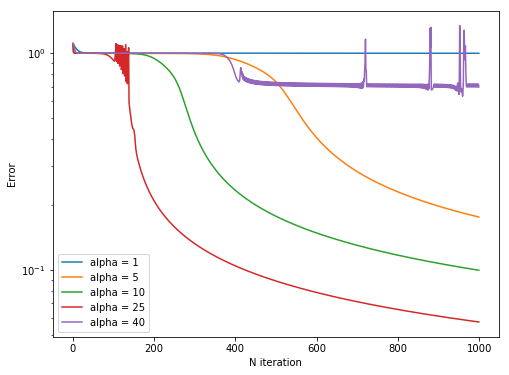

In [17]:
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(niter),e1,np.arange(niter),e2,np.arange(niter),e3,np.arange(niter),e4,np.arange(niter),e5)
plt.xlabel('N iteration')
plt.ylabel('Error')
plt.legend(['alpha = 1','alpha = 5','alpha = 10','alpha = 25','alpha = 40'])
plt.savefig('fig2.png')
plt.show()